In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the Data

In [2]:
housing=pd.read_csv('Boston.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing= housing.reset_index(drop=True) 

## EDA (Exploratory Data Analysis)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['TAX'].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: TAX, Length: 66, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284329,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704912,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

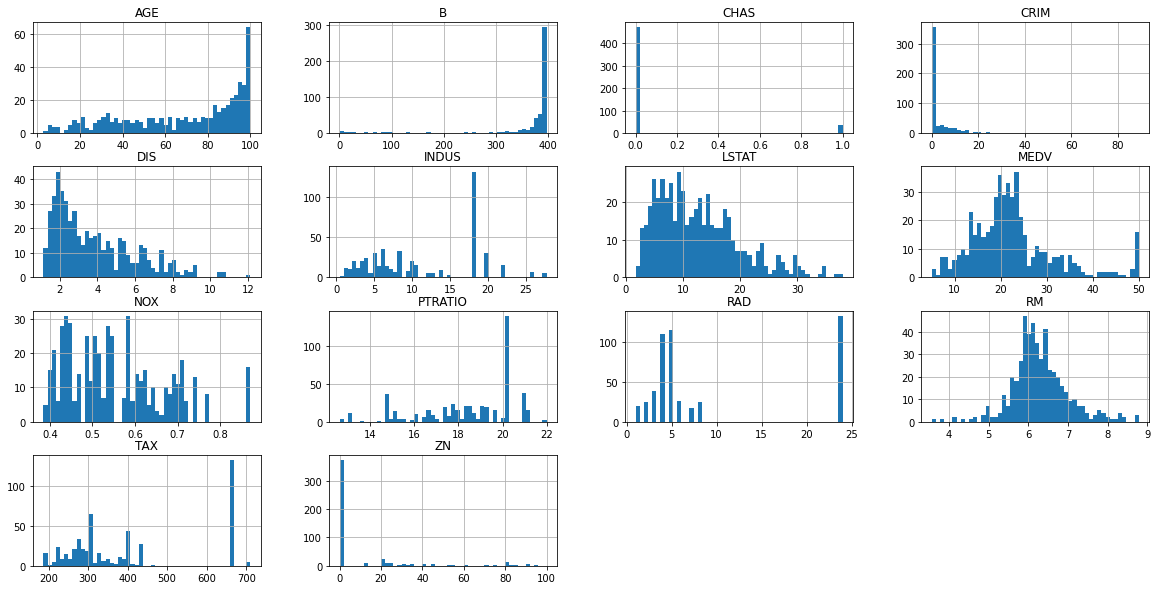

In [8]:
housing.hist(bins=50, figsize=(20,10))

## Train-test Splitting

In [9]:
def train_test_split(data,test_ratio):
    np.random.seed(42) 
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set=train_test_split(housing,0.2)

In [11]:
print(f'Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}')

Rows in train set:405 
Rows in test set:101


In [12]:
 from sklearn.model_selection import train_test_split

In [13]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f'Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}')

Rows in train set:404 
Rows in test set:102


# Splitting the data using Sklearn

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [16]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [17]:
housing=strat_train_set.copy()
housing.shape

(404, 14)

## Correlation matrix

In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678890
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

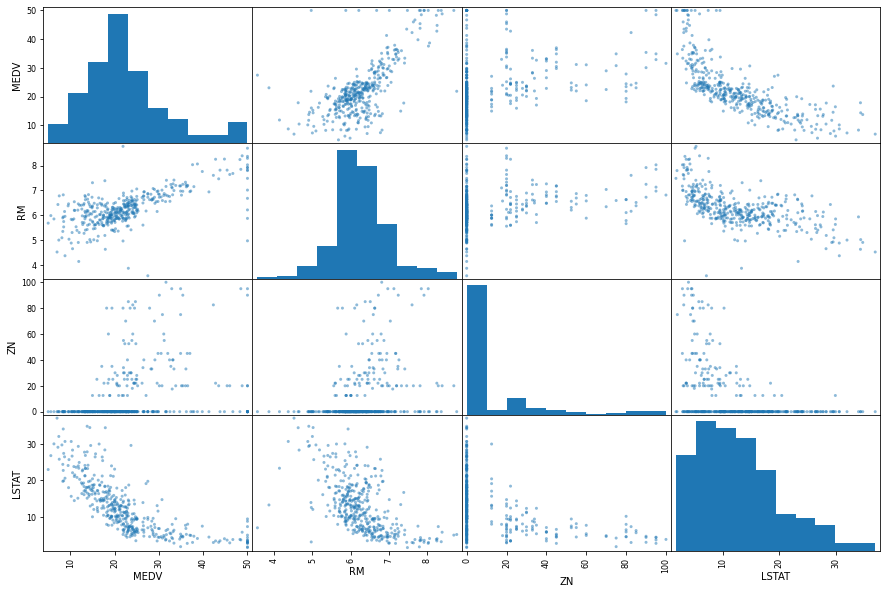

In [21]:
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(15,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

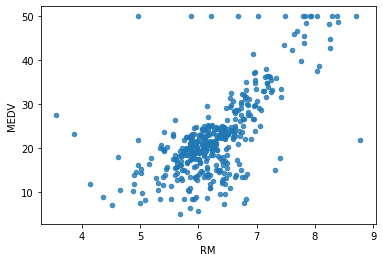

In [22]:
housing.plot(kind="scatter",x='RM',y="MEDV",alpha=0.8)

# New Attribute

In [23]:
 housing['TaxRM']=housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678890
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TaxRM     -0.523463
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


<AxesSubplot:xlabel='TaxRM', ylabel='MEDV'>

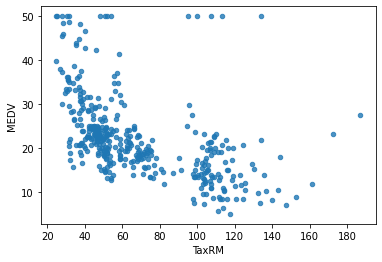

In [27]:
housing.plot(kind="scatter",x='TaxRM',y="MEDV",alpha=0.8)

In [28]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()
#housing=housing.drop('CAT. MEDV', axis=1)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


## Missiing Values

In [29]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [30]:
median=housing['RM'].median()

In [31]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 13)

# Imputting using Scikit Learn

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X=imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278072,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711666,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit Learn design

There are 3 types of objects

1.Estimators-it estimates some parameters based on dataset Eg. imputer.It has a fit method and transform method. Fits the dataset and calculates internal parameters

2.Transformers- it takes i/p and return o/p based on learning from fit(). it also has a convenience function called fit_transform() which fits and then transforms

3.Predictors- LinearRegression model is an eg of predictor. fit() and predict() are 2 common functions. it also allows to use score() function which will evaluate the predictors 

## Fatures scallingg
There are primarily 2 method
1. Min-Max scalling (Normalization)= (value - min)/(max - min)  MinMaxScaler for this
2.Standardization= (value - min)/std

## Creating Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
    
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr.shape

(404, 13)

## Selecting desired model for Dragon Real Estates

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [42]:
some_data=housing.iloc[:5]

In [43]:
some_labels=housing_labels.iloc[:5]

In [44]:
prepared_data=my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.59 , 25.452, 16.379, 23.317, 23.388])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluation model

In [47]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
housing_prediction
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [48]:
rmse

1.1613173106604424

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([2.81162032, 2.88970191, 4.47063052, 2.59435851, 3.22469205,
       2.72385273, 4.63807277, 3.23985089, 3.24412086, 3.33125902])

In [51]:
def print_scores(scores):
    print('Scores:', scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:', scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [2.81162032 2.88970191 4.47063052 2.59435851 3.22469205 2.72385273
 4.63807277 3.23985089 3.24412086 3.33125902]
Mean: 3.3168159578500394
Standard Deviation: 0.6639360218278465


Convert notebook into python file and run the pipeline using VSC

## Saving the model

In [53]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model

In [54]:
X_test=strat_test_set.drop('MEDV',axis=1)
Y_test=strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
test_predictions = model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,test_predictions)
final_rmse=np.sqrt(final_mse)
print(test_predictions)


[24.546 11.563 25.609 22.307 18.562 14.932 19.845 14.599 31.848 40.099
 19.933 11.744 23.737 27.334 19.475 10.575 31.551 14.48  23.399 18.914
 19.711 18.142 17.237 22.019 18.147 30.691 16.415 32.884  8.771 33.63
 23.965 21.441 22.89  10.894 20.762 11.339 42.192 24.619 23.811 42.522
 23.858 29.287 20.601 22.817 19.406 33.427 44.519 20.071 20.313 21.903
 21.42  14.752 21.061 15.304 24.96  32.742 42.162 29.293 19.347 20.817
 47.24  10.08  18.83  24.629 15.242 33.16  19.507 18.142 18.95  34.423
 27.683 22.729 21.584 22.379 35.232 12.776 15.997 20.228 20.791 21.73
 22.245 21.579 14.35  22.61  20.734 21.125 14.001 21.429 21.875 22.934
 18.729 27.504  7.276 26.142 18.738 29.993 19.702 31.46  14.324 26.335
 20.993 20.277]


In [55]:
final_rmse


2.9242656711876016

In [56]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.50216098, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])

In [57]:
from joblib import dump, load
import numpy as np
model=load( 'Dragon.joblib')

In [58]:
features=np.array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.50216098, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])
print('Predicted Price for the house:',model.predict([features]))

Predicted Price for the house: [25.452]
